# Loan Defaulter Prediction

## Problem Statement
- The Bank Indessa has not done well in last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.
- After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.
- This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with bank, the investors perform a due diligence on the requested loan application. Keep this in mind while understanding data.
- In this challenge, you will help this bank by predicting the probability that a member will default.

## Data Acquisition:
- Download the dataset from the following link: https://drive.google.com/drive/folders/15rWe7Mq7BgEyTQ7OZKLK-avJ0L9oveXP?usp=sharing

## Machine Learning task : 
- Binary Classification {Defaulter:1 , Non- Defaulter:0}

##Evaluation Metric:
- Since the data was imbalanced, So , metric used is ROC-AUC

## Approach
- Load data
- Exploratory Data Analysis

In [3]:
cd drive/My\ Drive/Artivatic

[Errno 2] No such file or directory: 'drive/My Drive/Artivatic'
/content/drive/My Drive


In [11]:
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.metrics import roc_curve, auc


# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
train = pd.read_csv('train_indessa.csv')
test= pd.read_csv('test_indessa.csv')
submission = pd.read_csv('sample_submission.csv')

In [7]:
train.shape , test.shape

((532428, 45), (354951, 44))

In [8]:
train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [12]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [13]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    354951 non-null  int64  
 1   loan_amnt                    354951 non-null  int64  
 2   funded_amnt                  354951 non-null  int64  
 3   funded_amnt_inv              354951 non-null  float64
 4   term                         354951 non-null  object 
 5   batch_enrolled               309352 non-null  object 
 6   int_rate                     354951 non-null  float64
 7   grade                        354951 non-null  object 
 8   sub_grade                    354951 non-null  object 
 9   emp_title                    334322 non-null  object 
 10  emp_length                   337017 non-null  object 
 11  home_ownership               354951 non-null  object 
 12  annual_inc                   354950 non-null  float64
 13 

## Checking Null Values

In [9]:
train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [10]:
test.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

- Lots of features has Null Values 

## Exploratory Data Analysis : 
- Let's dive deep into each feature and gain some insights about the data.

# CATEGORICAL FEATURES

In [30]:
### pivot_table for two categorical features one being loan_status
def pivot(col): 
  return pd.pivot_table(train,'member_id',index=[col],columns=['loan_status'],aggfunc='count')

## Lets check the Data Imbalance

0    406601
1    125827
Name: loan_status, dtype: int64


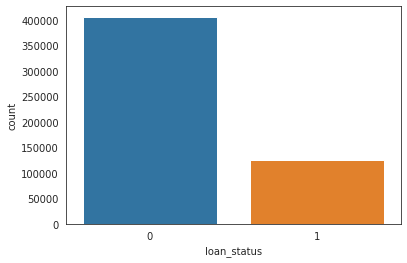

In [60]:
#Imbalanced dataset
ax = sns.countplot(x=train['loan_status'], data=train)
print(train['loan_status'].value_counts())

- Imbalanced Dataset, so ROC-AUC score will be the best metric for this problem

## Let's check term of loan (in months)

36 months    372793
60 months    159635
Name: term, dtype: int64


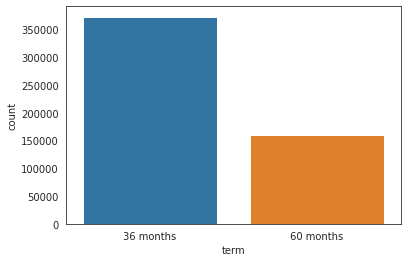

In [15]:
ax = sns.countplot(x=train['term'], data=train)
print(train['term'].value_counts())

In [37]:
pivot('term')

loan_status,0,1
term,,
36 months,271120,101673
60 months,135481,24154


- Most people opt for 36 months or 3 years term loan

## Let's check employment length, where 0 means less than one year and 10 means ten or more years

10+ years    175105
2 years       47276
< 1 year      42253
3 years       42175
1 year        34202
5 years       33393
4 years       31581
7 years       26680
8 years       26443
6 years       25741
9 years       20688
Name: emp_length, dtype: int64


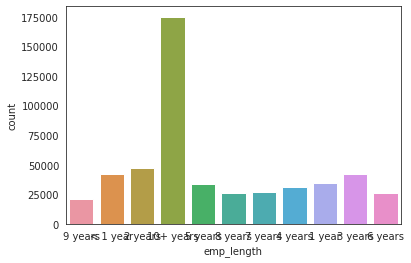

In [27]:
ax = sns.countplot(x=train['emp_length'], data=train)
print(train['emp_length'].value_counts())

- People who are employed for 10+ years tend to take loans more since they might have stable income source now . So, it will be beneficial to target those audience with 'emp_length = 10+years' .

## Let's check status of home ownership

MORTGAGE    265940
RENT        213668
OWN          52664
OTHER          117
NONE            36
ANY              3
Name: home_ownership, dtype: int64


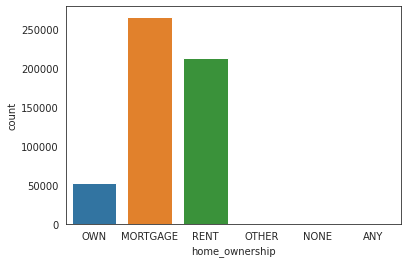

In [28]:
ax = sns.countplot(x=train['home_ownership'], data=train)
print(train['home_ownership'].value_counts())

- We can see that most people keep their home as mortgage to take huge amounts of loan . 
- Bigger the house , more is the income of the person,
more is the employment lenth, more amount of loan can be taken

In [32]:
## Defaulter =1 , Non-Defaulter=0
pivot('home_ownership')

loan_status,0,1
home_ownership,,
ANY,2,1
MORTGAGE,202344,63596
NONE,8,28
OTHER,27,90
OWN,41737,10927
RENT,162483,51185


## Let's check status of income verified by the bank

Source Verified    197750
Verified           174702
Not Verified       159976
Name: verification_status, dtype: int64


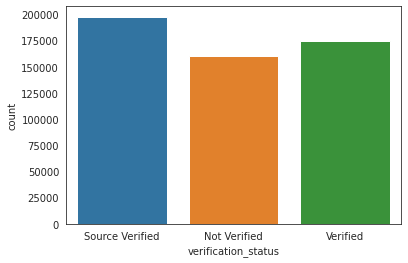

In [33]:
ax = sns.countplot(x=train['verification_status'], data=train)
print(train['verification_status'].value_counts())

In [34]:
## Defaulter =1 , Non-Defaulter=0
pivot('verification_status')

loan_status,0,1
verification_status,,
Not Verified,115028,44948
Source Verified,161329,36421
Verified,130244,44458


- We can see that :
__For Defaulters - status of verified income by the bank is also less. So, not trustworthy__

## Let's view the purpose of loans

debt_consolidation    314989
credit_card           123670
home_improvement       31087
other                  25652
major_purchase         10284
small_business          6146
car                     5266
medical                 5117
moving                  3243
vacation                2812
house                   2170
wedding                 1401
renewable_energy         331
educational              260
Name: purpose, dtype: int64


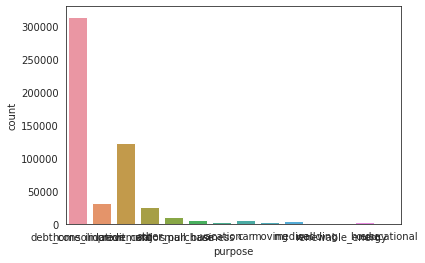

In [35]:
ax = sns.countplot(x=train['purpose'], data=train)
print(train['purpose'].value_counts())

## Let's check for loan application types

INDIVIDUAL    532123
JOINT            305
Name: application_type, dtype: int64


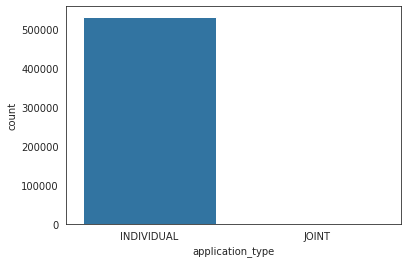

In [38]:
ax = sns.countplot(x=train['application_type'], data=train)
print(train['application_type'].value_counts())

- Most people opt for individual loans

In [39]:
pivot('application_type')

loan_status,0,1
application_type,,
INDIVIDUAL,406297,125826
JOINT,304,1


## Let's check 'verification_status_joint'. This should be ignorable quantities for "Defaulters"

Not Verified       170
Verified           102
Source Verified     33
Name: verification_status_joint, dtype: int64


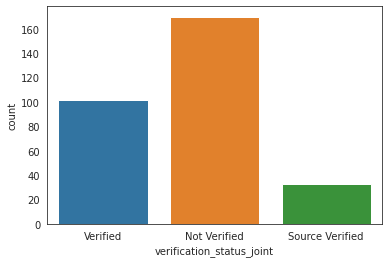

In [43]:
ax = sns.countplot(x=train['verification_status_joint'], data=train)
print(train['verification_status_joint'].value_counts())


In [44]:
## Defaulter =1 , Non-Defaulter=0
pivot('verification_status_joint')

loan_status,0,1
verification_status_joint,,
Not Verified,170.0,NaN
Source Verified,32.0,1.0
Verified,102.0,NaN


- Previously we saw in 'application_type' , there was ignorable quantity of Defaulters in Joint loan category.

- Here also we can see that , if the Defaulters dont take the joint application option then obviously they wont have any income to be verified by the bank. 

- Makes Sense !

## Let's check the Grade assigned by the bank
- Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.

B    152713
C    147499
A     89107
D     83567
E     42495
F     13826
G      3221
Name: grade, dtype: int64


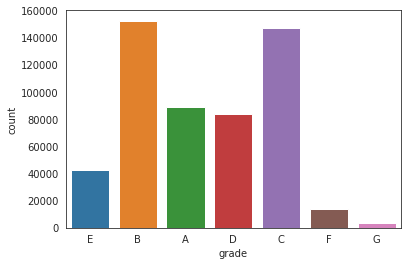

In [45]:
ax = sns.countplot(x=train['grade'], data=train)
print(train['grade'].value_counts())

In [46]:
## Defaulter =1 , Non-Defaulter=0
pivot('grade')

loan_status,0,1
grade,,
A,65148,23959
B,112507,40206
C,115579,31920
D,65419,18148
E,34553,7942
F,10934,2892
G,2461,760


## Let's see the 'payment plan'
- indicates if any payment plan has started against loan

n    532420
y         8
Name: pymnt_plan, dtype: int64


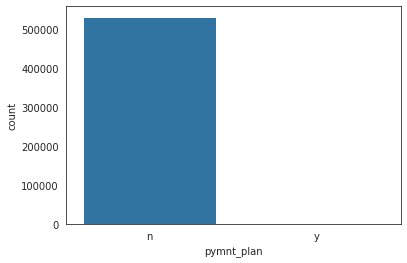

In [47]:
ax = sns.countplot(x=train['pymnt_plan'], data=train)
print(train['pymnt_plan'].value_counts())

In [48]:
## Defaulter =1 , Non-Defaulter=0
pivot('pymnt_plan')

loan_status,0,1
pymnt_plan,,
n,406595,125825
y,6,2


- The status = 'n' is more , so payment plan for the loans granted have not started for majority.


## Let's check the 'State' where loan is granted maximum.
- Should be places where income is comparatively larger than usual

CA    77911
NY    44406
TX    42527
FL    36575
IL    21205
NJ    20103
PA    18882
OH    17778
GA    17292
VA    15826
NC    14812
MI    13869
MD    12667
MA    12385
AZ    12320
WA    11664
CO    11233
MN     9577
MO     8538
IN     8197
CT     8075
TN     7817
NV     7408
WI     6880
AL     6699
OR     6549
SC     6331
LA     6304
KY     5140
KS     4818
OK     4797
AR     3988
UT     3829
NM     2958
HI     2705
WV     2615
NH     2568
RI     2322
MS     2296
MT     1545
DE     1512
DC     1477
AK     1346
WY     1198
SD     1091
VT     1062
NE      709
ME      324
ND      284
IA        7
ID        7
Name: addr_state, dtype: int64


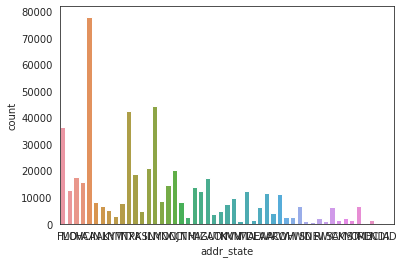

In [49]:
ax = sns.countplot(x=train['addr_state'], data=train)
print(train['addr_state'].value_counts())

- We can see that for CA i.e. California , it is highest. Since the incomes are also very high there.

## Let's check the unique listing status of the loan - W(Waiting), F(Forwarded)

f    274018
w    258410
Name: initial_list_status, dtype: int64


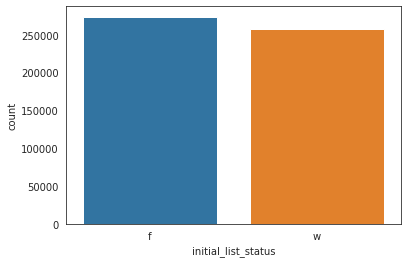

In [51]:
ax = sns.countplot(x=train['initial_list_status'], data=train)
print(train['initial_list_status'].value_counts())

In [52]:
pivot('initial_list_status')

loan_status,0,1
initial_list_status,,
f,183320,90698
w,223281,35129


- Unique pattern :  
- For Non Defaulters : loans are in waiting state more than in forwarded state.
- For Defaulters : loans are in forwarded state more than in waiting state.

# NUMERICAL FEATURES

In [64]:
def plot_hist(df,col,bin_size,log=None):
    fig = plt.figure(figsize=(30, 6))
    ax = fig.add_subplot(111)
    if log==True:
        x0 = np.log(df[df.loan_status==0][col].dropna().values+1)
        x1 = np.log(df[df.loan_status==1][col].dropna().values+1)
        min_ = min(np.log(df[col].dropna().values+1))
        max_ = max(np.log(df[col].dropna().values+1))
        bins = np.linspace(min_,max_,bin_size)
    else:
        x0 = df[df.loan_status==0][col].dropna().values
        x1 = df[df.loan_status==1][col].dropna().values
        bins = np.linspace(df[col].min(),df[col].max(),bin_size)
    ax.hist(x1,bins=bins,label='1',color='b',alpha=0.5)
    ax.hist(x0,bins=bins,label='0',color='r',alpha=0.5)
    ax.set_ylabel("total members")
    ax.set_xlabel(col)
    ax.set_title("{} vs defaulter(0,1)".format(col))
    ax.set_xticks(bins)
    plt.xticks(rotation=70)
    plt.legend(loc='upper right')
    plt.show()
    return

## Firstly let's chek the annual incomes

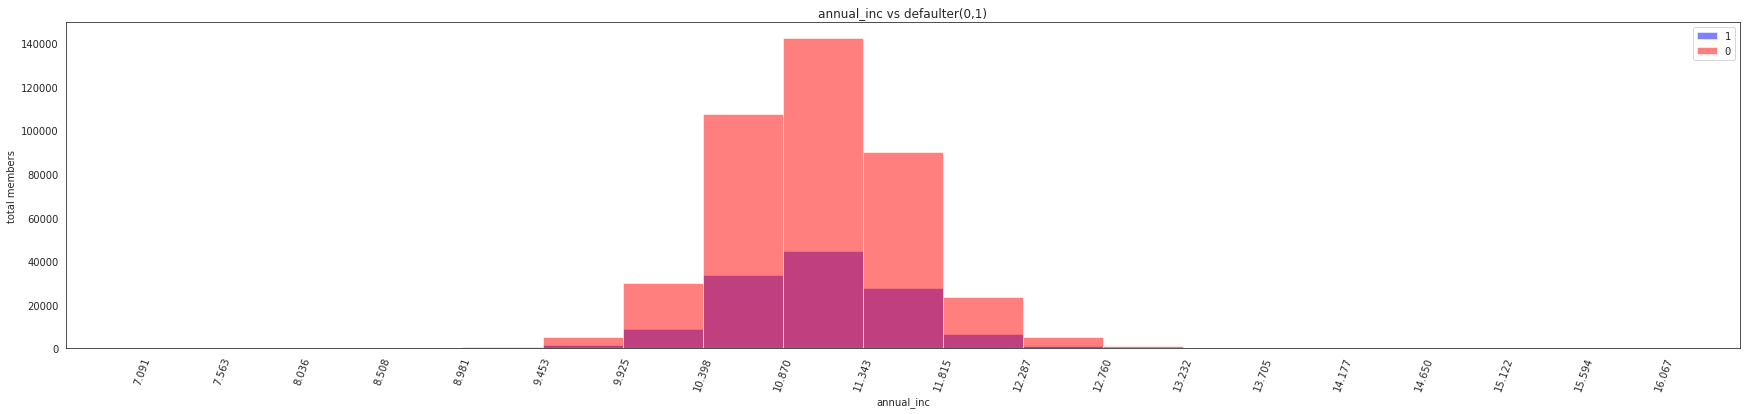

In [80]:
plot_hist(train,'annual_inc',20,True)

- Annual Income of Defaulter is very less, no doubt that they are referred to as Defaulters by bank

## Let's check post charge off collection fee :
- A charge-off refers to debt that a company believes it will no longer collect as the borrower has become delinquent on payments.

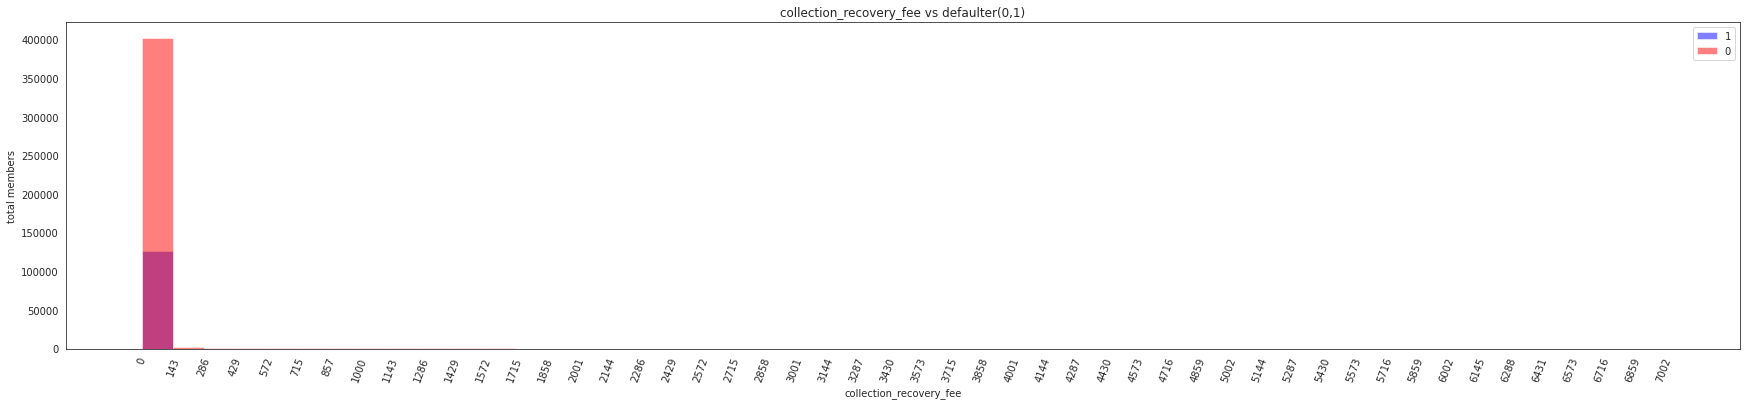

In [65]:
plot_hist(train,'collection_recovery_fee',50)

- post charge off collection fee is 0 means, most loan bearers have no charge-off debt to the bank,
-  Defaulters are again less in this. 


## Let;s check post charge off gross recovery fee:

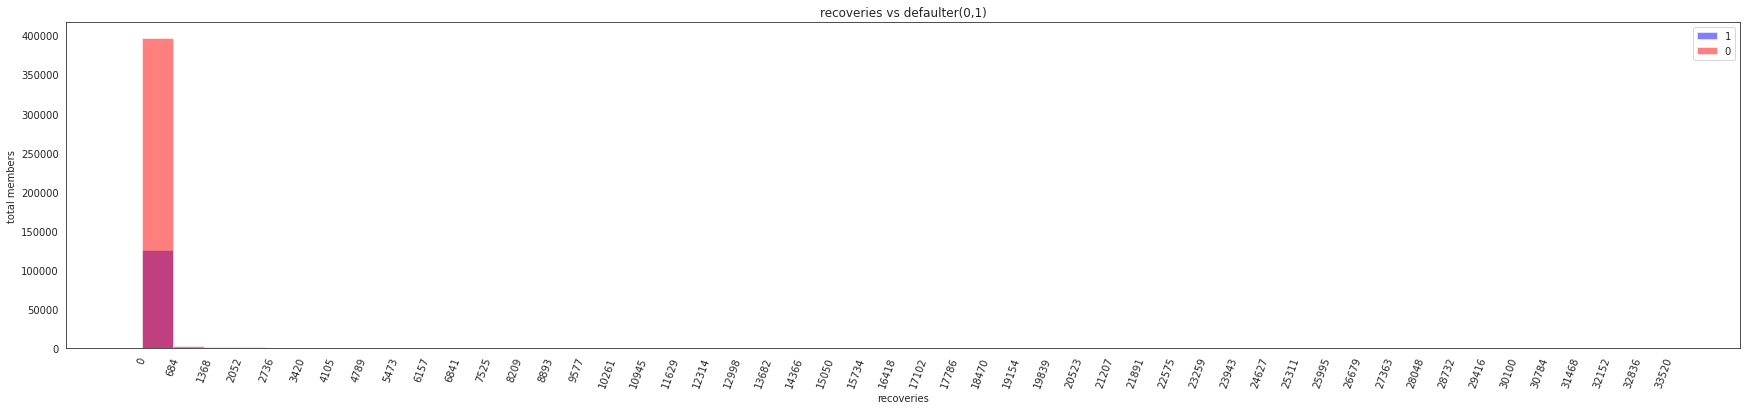

In [66]:
plot_hist(train,'recoveries',50)

## Let's check 'mths_since_last_delinq'.
- the term "delinquent" commonly refers to a situation where a borrower is late or overdue on a payment, such as income taxes, a mortgage, an automobile loan, or a credit card account. There are consequences for being delinquent, depending on the type, duration and cause of the delinquency.

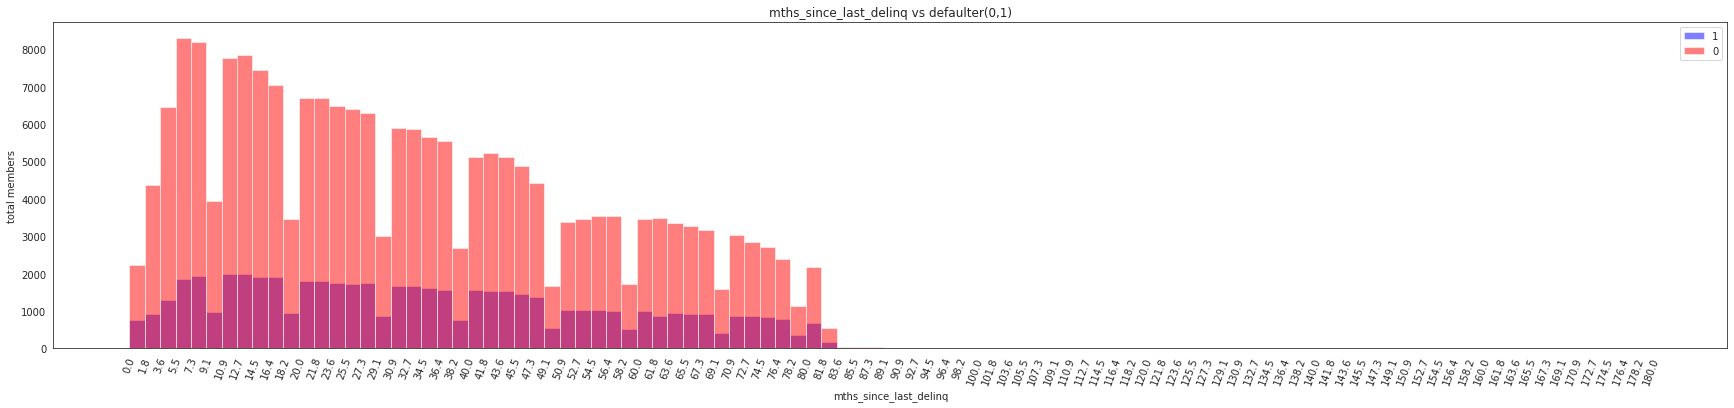

In [67]:
plot_hist(train,'mths_since_last_delinq',100)

## Let's check the funded amount
- loan amount ($) sanctioned by the bank

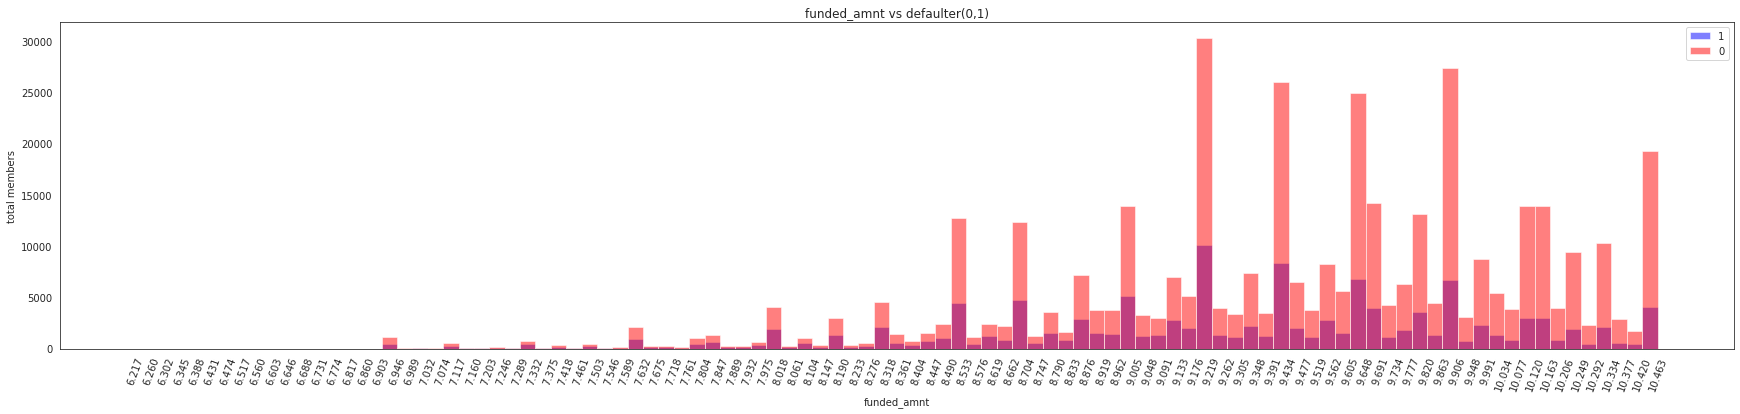

In [72]:
plot_hist(train,'funded_amnt',100,True)

- max loan amount santioned in dollar : between 9.176 to 9.219

## Let'check the loan amount ($) applied by the member

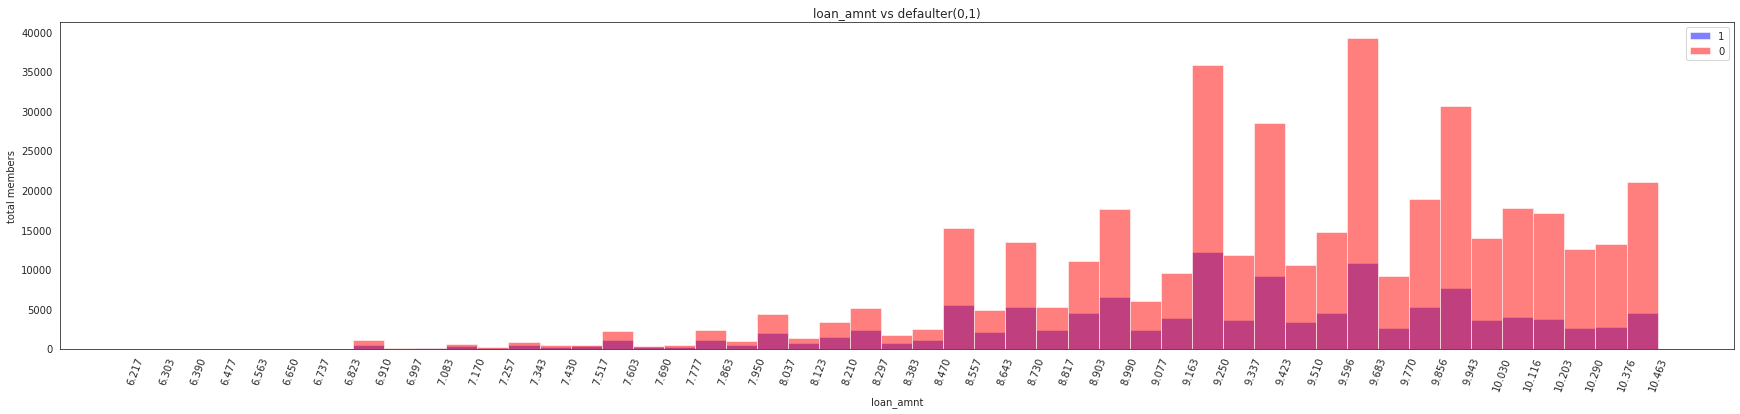

In [74]:
plot_hist(train,'loan_amnt',50,True)

## Let's check number of open credit line in member's credit line

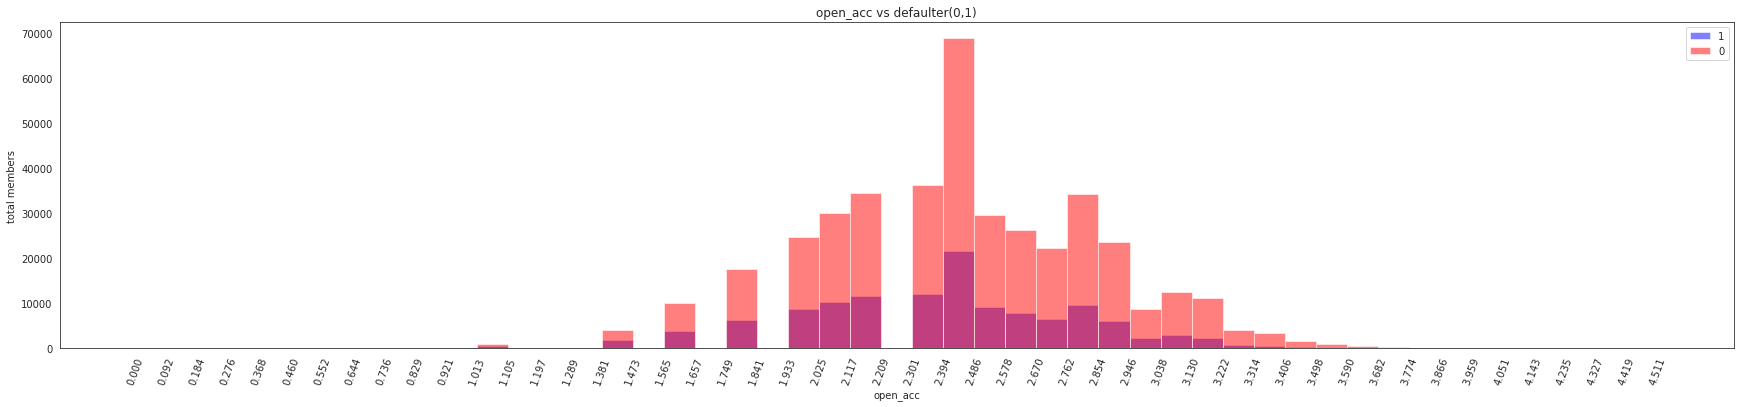

In [75]:
plot_hist(train,'open_acc',50,True)

## Let's check total number of credit lines available in members credit line

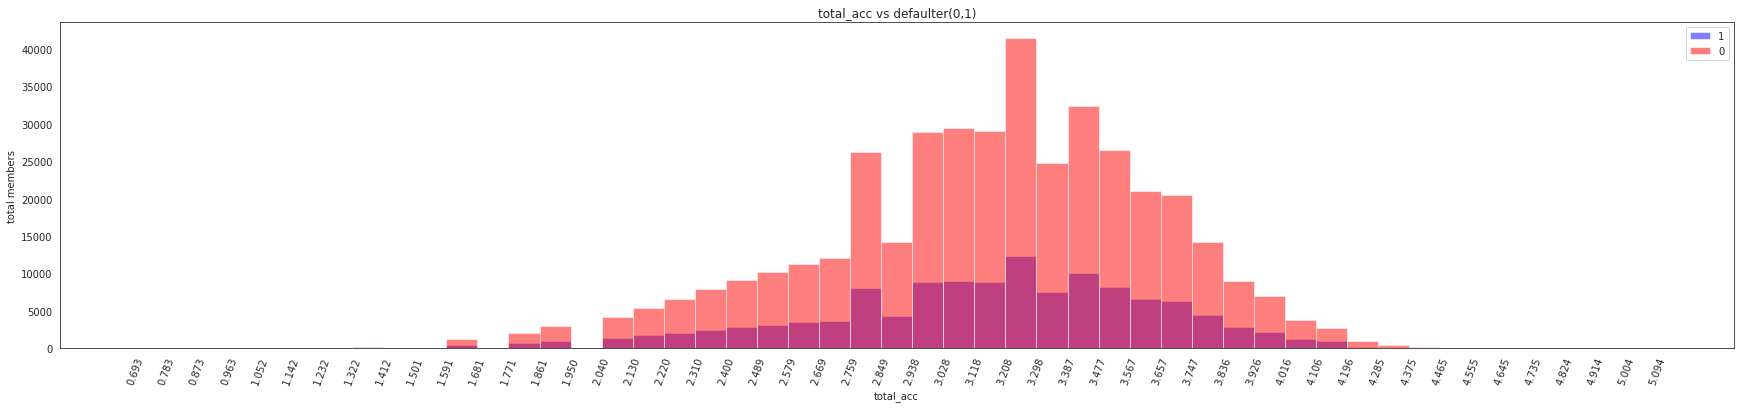

In [76]:
plot_hist(train,'total_acc',50,True)

## Let's check total credit revolving balance

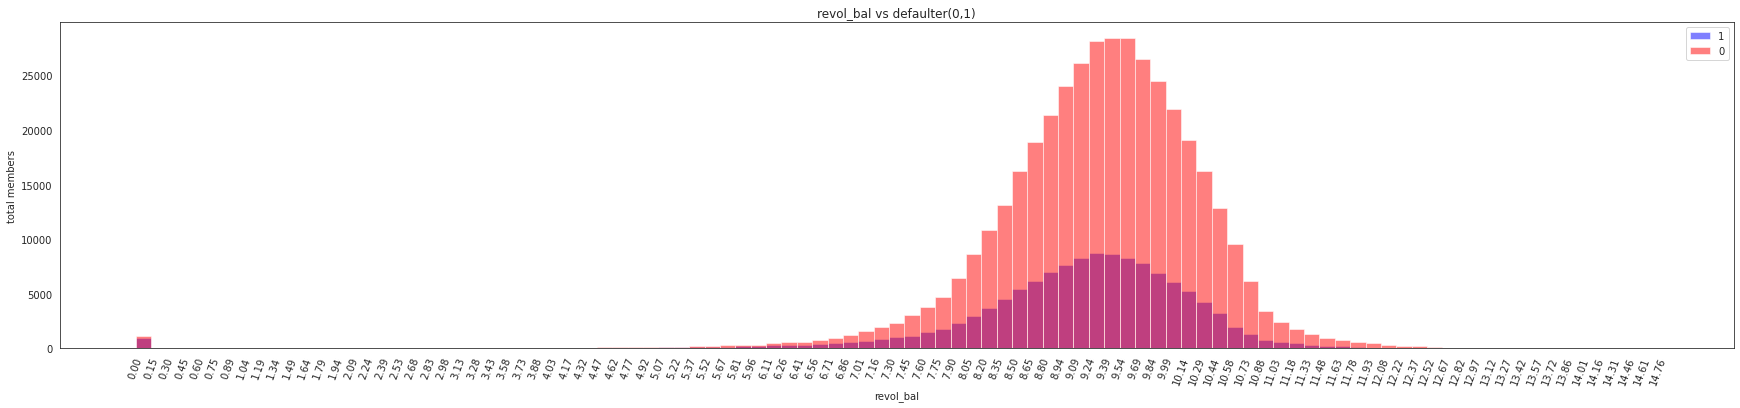

In [77]:
plot_hist(train,'revol_bal',100,True)

## Let's check total revolving credit limit

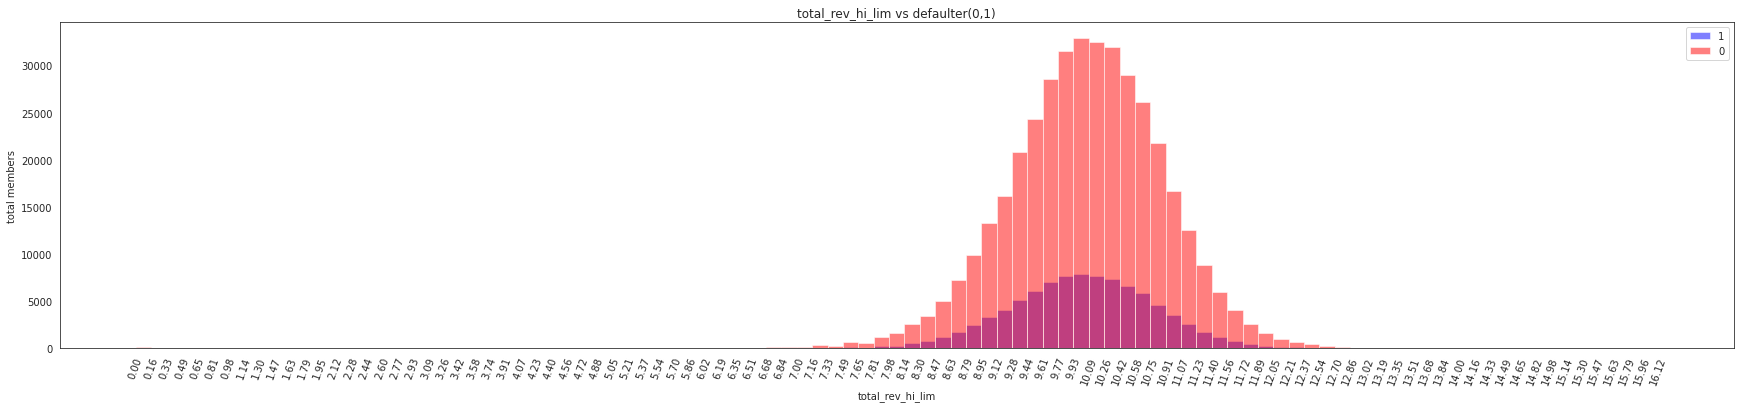

In [78]:
plot_hist(train,'total_rev_hi_lim',100,True)

## Let's check number of collections in last 12 months excluding medical collections

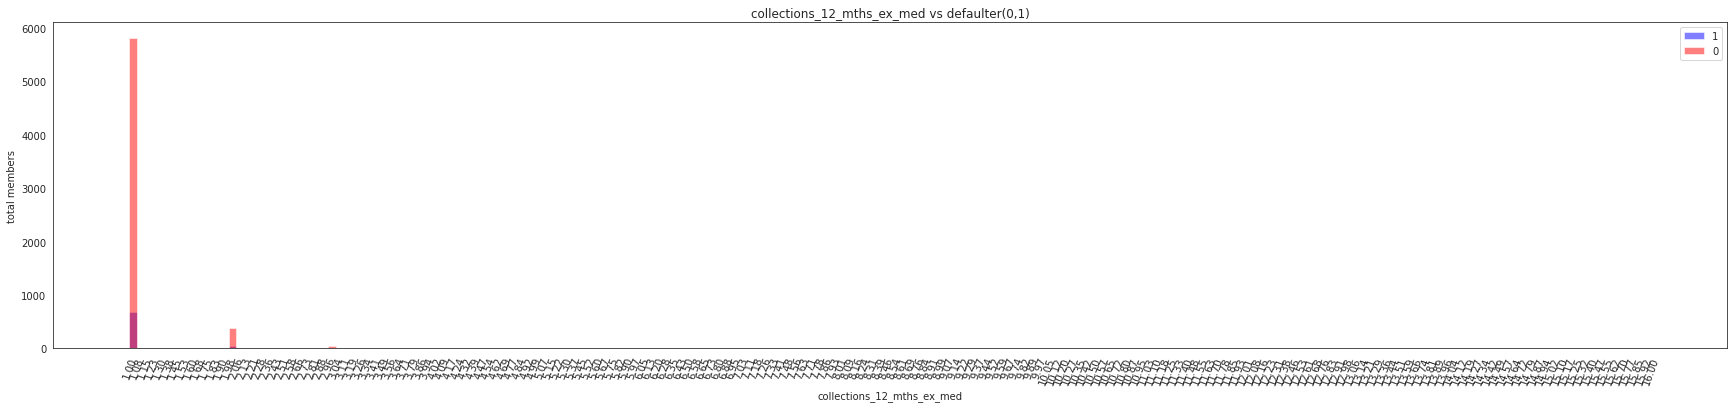

In [82]:
plot_hist(train[train.collections_12_mths_ex_med!=0],'collections_12_mths_ex_med',200)


## Let's check ratio of member's total monthly debt repayment excluding mortgage divided by self reported monthly income

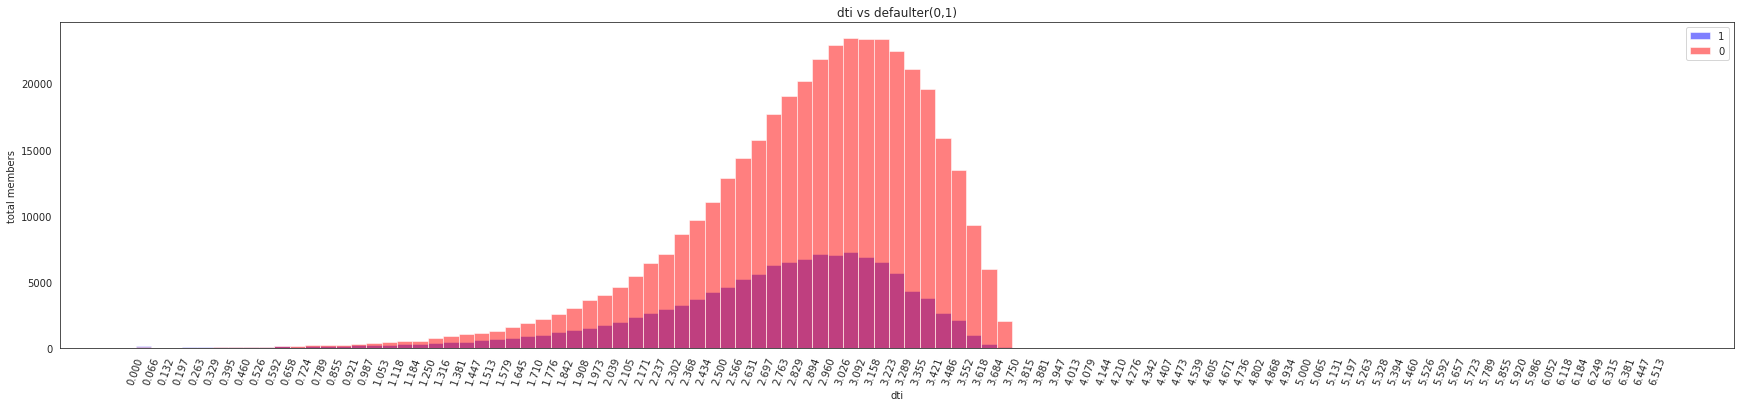

In [83]:
plot_hist(train,'dti',100,True)

## Let's check number of inquiries in last 6 months

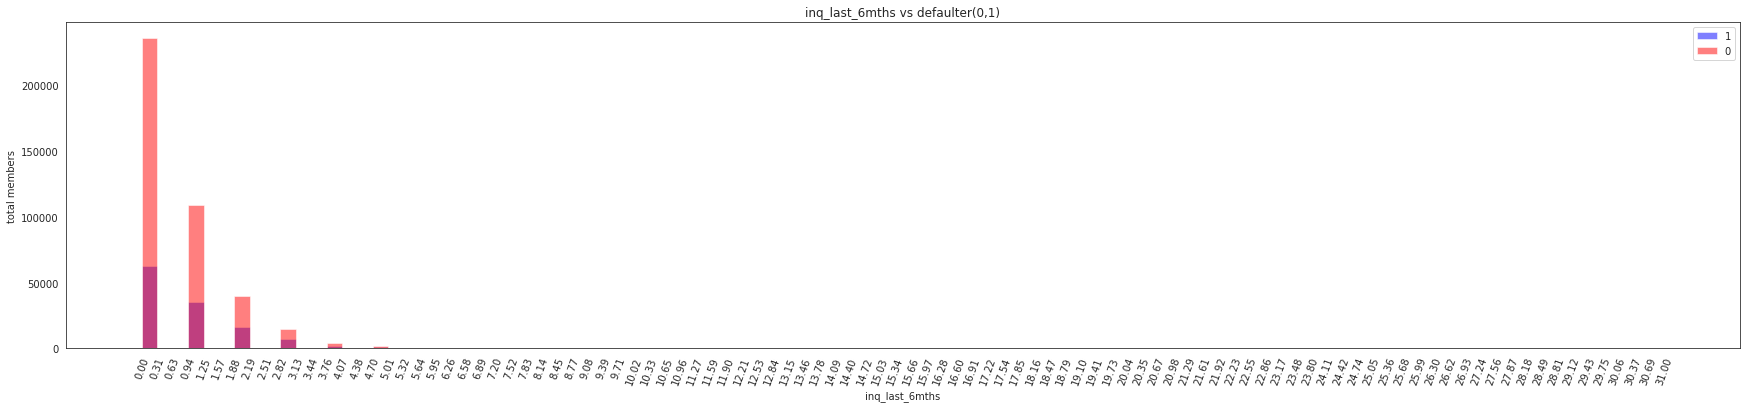

In [84]:
plot_hist(train,'inq_last_6mths',100)

## Let's check interest rate (%) on loan

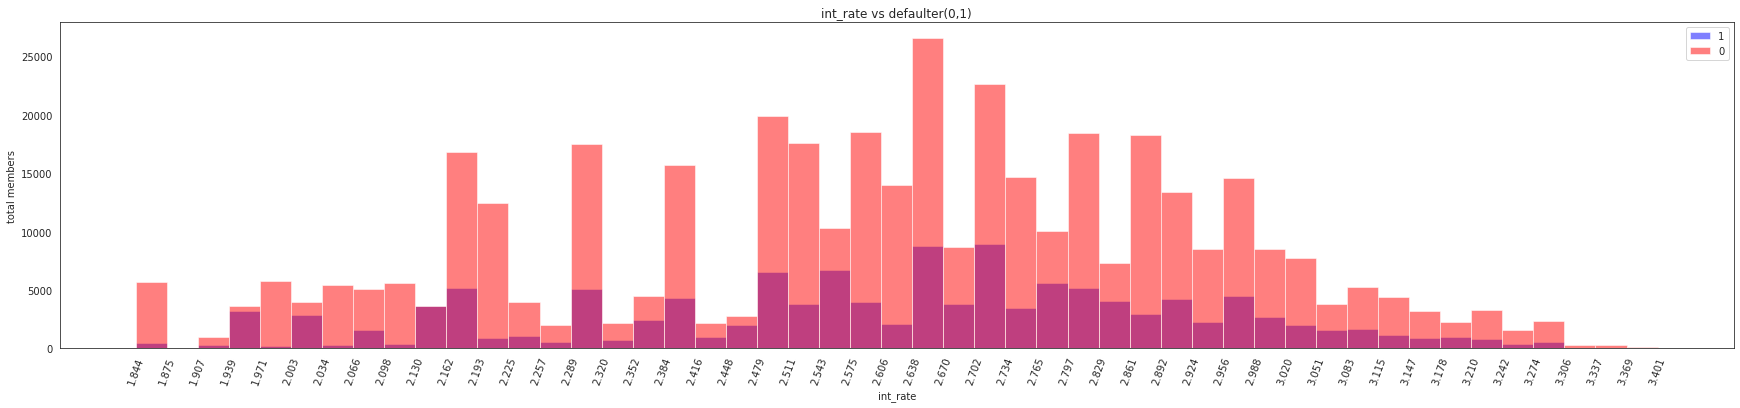

In [85]:
plot_hist(train,'int_rate',50,True)

## Let's check amount of credit a member is using relative to revol_bal

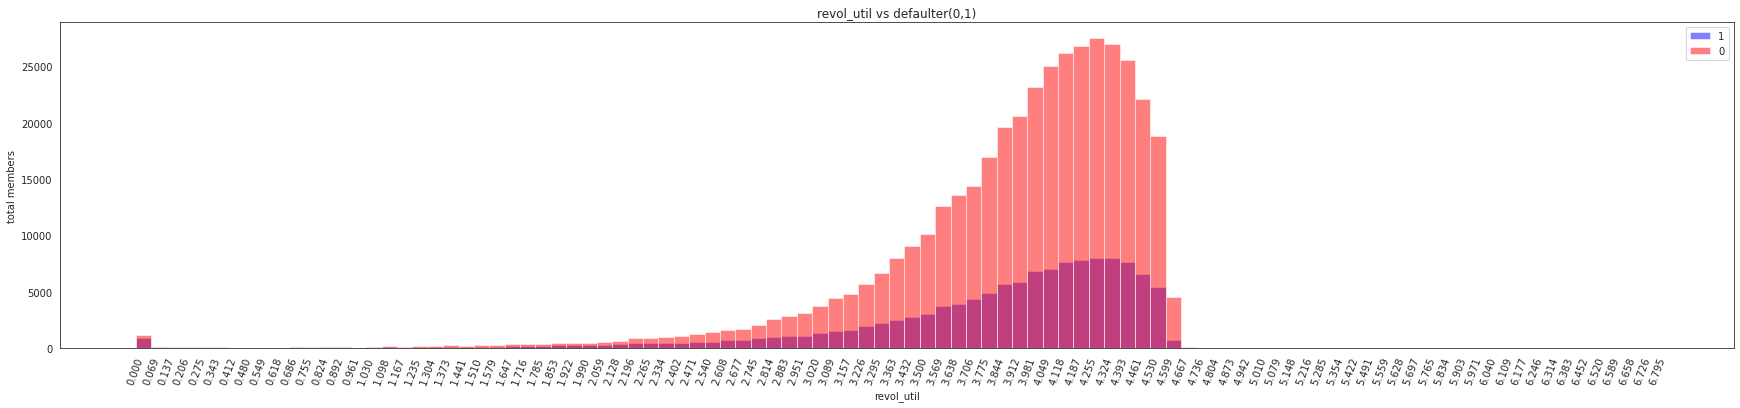

In [86]:
plot_hist(train,'revol_util',100,True)

## Let's check total current balance of all accounts

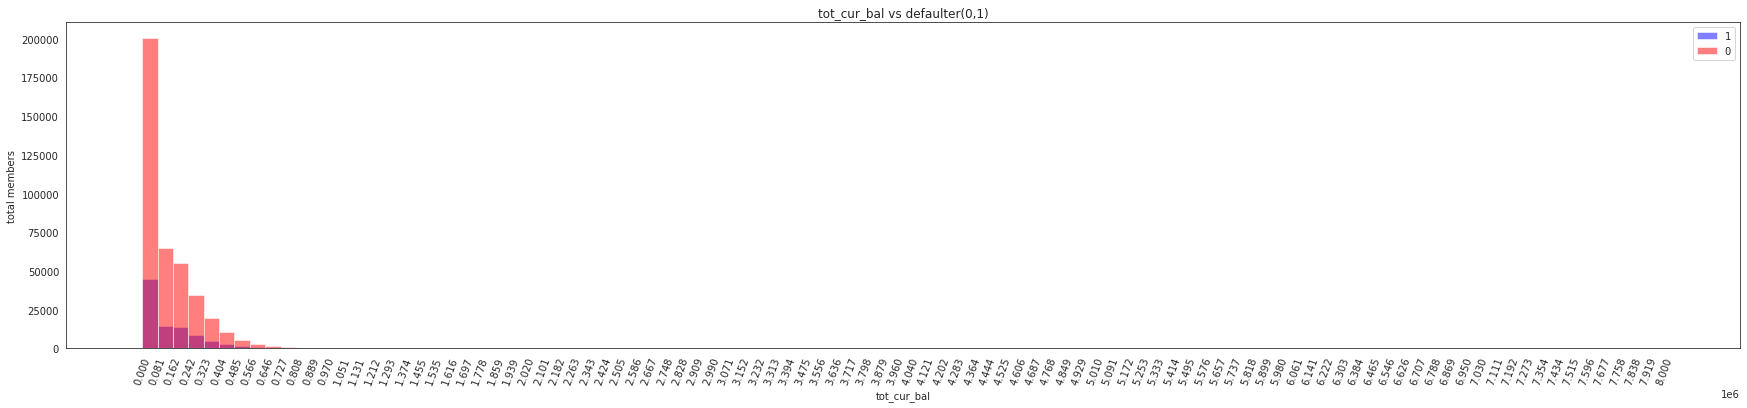

In [87]:
plot_hist(train,'tot_cur_bal',100)

- More people have less total current balance of all accounts